In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_nopass = pd.concat([pd.read_csv("results/out_nopass/faults_memory.csv"),
                       pd.read_csv("results/out_nopass/faults_registers.csv")])

df_eddi_cfcss = pd.concat([pd.read_csv("results/out_eddi_cfcss/faults_memory.csv"),
                           pd.read_csv("results/out_eddi_cfcss/faults_registers.csv")]+
                           [pd.read_csv("results/out_eddi_cfcss/faults_memory_new.csv"),
                           pd.read_csv("results/out_eddi_cfcss/faults_registers_new.csv")])

df_eddi_rasm_inter = pd.concat([pd.read_csv("results/out_eddi_rasm_inter/faults_memory.csv"),
                                pd.read_csv("results/out_eddi_rasm_inter/faults_registers.csv")]+
                                [pd.read_csv("results/out_eddi_rasm_inter/faults_memory_new.csv"),
                                pd.read_csv("results/out_eddi_rasm_inter/faults_registers_new.csv")])

df_eddi_rasm = pd.concat([pd.read_csv("results/out_eddi_rasm/faults_memory.csv"),
                          pd.read_csv("results/out_eddi_rasm/faults_registers.csv")]+
                          [pd.read_csv("results/out_eddi_rasm/faults_memory_new.csv"),
                          pd.read_csv("results/out_eddi_rasm/faults_registers_new.csv")])

df_fdsc_cfcss = pd.concat([pd.read_csv("results/out_fdsc_cfcss/faults_memory.csv"),
                           pd.read_csv("results/out_fdsc_cfcss/faults_registers.csv")]+
                           [pd.read_csv("results/out_fdsc_cfcss/faults_memory_new.csv"),
                           pd.read_csv("results/out_fdsc_cfcss/faults_registers_new.csv")])

df_fdsc_rasm_inter = pd.concat([pd.read_csv("results/out_fdsc_rasm_inter/faults_memory.csv"),
                                pd.read_csv("results/out_fdsc_rasm_inter/faults_registers.csv")]+
                                [pd.read_csv("results/out_fdsc_rasm_inter/faults_memory_new.csv"),
                                pd.read_csv("results/out_fdsc_rasm_inter/faults_registers_new.csv")])

df_fdsc_rasm = pd.concat([pd.read_csv("results/out_fdsc_rasm/faults_memory.csv"),
                          pd.read_csv("results/out_fdsc_rasm/faults_registers.csv")]+
                          [pd.read_csv("results/out_fdsc_rasm/faults_memory_new.csv"),
                          pd.read_csv("results/out_fdsc_rasm/faults_registers_new.csv")])

df_seddi_cfcss = pd.concat([pd.read_csv("results/out_seddi_cfcss/faults_memory.csv"),
                           pd.read_csv("results/out_seddi_cfcss/faults_registers.csv")]+
                           [pd.read_csv("results/out_seddi_cfcss/faults_memory_new.csv"),
                           pd.read_csv("results/out_seddi_cfcss/faults_registers_new.csv")])

df_seddi_rasm_inter = pd.concat([pd.read_csv("results/out_seddi_rasm_inter/faults_memory.csv"),
                                pd.read_csv("results/out_seddi_rasm_inter/faults_registers.csv")]+
                                [pd.read_csv("results/out_seddi_rasm_inter/faults_memory_new.csv"),
                                pd.read_csv("results/out_seddi_rasm_inter/faults_registers_new.csv")])

df_seddi_rasm = pd.concat([pd.read_csv("results/out_seddi_rasm/faults_memory.csv"),
                          pd.read_csv("results/out_seddi_rasm/faults_registers.csv")]+
                          [pd.read_csv("results/out_seddi_rasm/faults_memory_new.csv"),
                          pd.read_csv("results/out_seddi_rasm/faults_registers_new.csv")])


dataframes = {"eddi_cfcss": df_eddi_cfcss,
              "eddi_rasm": df_eddi_rasm,
              "eddi_rasm_inter": df_eddi_rasm_inter,
              "fdsc_cfcss": df_fdsc_cfcss,
              "fdsc_rasm": df_fdsc_rasm,
              "fdsc_rasm_inter": df_fdsc_rasm_inter,
              "seddi_cfcss": df_seddi_cfcss,
              "seddi_rasm": df_seddi_rasm,
              "seddi_rasm_inter": df_seddi_rasm_inter
              }

dataframes["nopass"] = df_nopass

In [3]:
df_new = pd.DataFrame()

for key in dataframes:
    df = dataframes[key]
    sz_tot = df.shape[0]
    df_errcodes = df.groupby('code')
    sz_df_errcodes = df_errcodes.size()
    df_new[key] = sz_df_errcodes

In [4]:
df_new.sum()

eddi_cfcss          37047.0
eddi_rasm           36174.0
eddi_rasm_inter     30181.0
fdsc_cfcss          42488.0
fdsc_rasm           41643.0
fdsc_rasm_inter     34241.0
seddi_cfcss         38975.0
seddi_rasm          36710.0
seddi_rasm_inter    30471.0
nopass              30000.0
dtype: float64

In [5]:
df_new.drop(0).transpose()

code,-3,-2,-1,1,2
eddi_cfcss,287.0,7.0,576.0,1188.0,942.0
eddi_rasm,262.0,7.0,573.0,1206.0,952.0
eddi_rasm_inter,175.0,7.0,880.0,1190.0,748.0
fdsc_cfcss,384.0,15.0,777.0,703.0,1121.0
fdsc_rasm,327.0,20.0,806.0,768.0,1079.0
fdsc_rasm_inter,251.0,22.0,1100.0,773.0,854.0
seddi_cfcss,339.0,13.0,662.0,1005.0,981.0
seddi_rasm,287.0,4.0,601.0,1062.0,1046.0
seddi_rasm_inter,206.0,6.0,1001.0,1046.0,741.0
nopass,770.0,39.0,929.0,NaN,NaN


In [6]:
(df_new / df_new.sum() * 100).transpose()

code,-3,-2,-1,0,1,2
eddi_cfcss,0.774692,0.018895,1.554782,91.902178,3.206737,2.542716
eddi_rasm,0.724277,0.019351,1.584011,91.706751,3.333886,2.631724
eddi_rasm_inter,0.579835,0.023193,2.915742,90.059972,3.942878,2.478380
fdsc_cfcss,0.903785,0.035304,1.828752,92.939183,1.654585,2.638392
fdsc_rasm,0.785246,0.048027,1.935499,92.795908,1.844248,2.591072
fdsc_rasm_inter,0.733039,0.064250,3.212523,91.238574,2.257528,2.494086
seddi_cfcss,0.869788,0.033355,1.698525,92.302758,2.578576,2.516998
seddi_rasm,0.781803,0.010896,1.637156,91.827840,2.892945,2.849360
seddi_rasm_inter,0.676053,0.019691,3.285091,90.154573,3.432772,2.431820
nopass,2.566667,0.130000,3.096667,94.206667,NaN,NaN


In [7]:
df_perc = (df_new.drop(0) / df_new.drop(0).sum() * 100).transpose()
df_perc

code,-3,-2,-1,1,2
eddi_cfcss,9.566667,0.233333,19.200000,39.600000,31.400000
eddi_rasm,8.733333,0.233333,19.100000,40.200000,31.733333
eddi_rasm_inter,5.833333,0.233333,29.333333,39.666667,24.933333
fdsc_cfcss,12.800000,0.500000,25.900000,23.433333,37.366667
fdsc_rasm,10.900000,0.666667,26.866667,25.600000,35.966667
fdsc_rasm_inter,8.366667,0.733333,36.666667,25.766667,28.466667
seddi_cfcss,11.300000,0.433333,22.066667,33.500000,32.700000
seddi_rasm,9.566667,0.133333,20.033333,35.400000,34.866667
seddi_rasm_inter,6.866667,0.200000,33.366667,34.866667,24.700000
nopass,44.303797,2.243959,53.452244,NaN,NaN


In [8]:
print("Percentage of faults detected by the SIHFT mechanism, considering only effective SEUs.")
df_new.drop([0, -1, -2, -3]).sum() / df_new.drop(0).sum() * 100

Percentage of faults detected by the SIHFT mechanism, considering only effective SEUs.


eddi_cfcss          71.000000
eddi_rasm           71.933333
eddi_rasm_inter     64.600000
fdsc_cfcss          60.800000
fdsc_rasm           61.566667
fdsc_rasm_inter     54.233333
seddi_cfcss         66.200000
seddi_rasm          70.266667
seddi_rasm_inter    59.566667
nopass               0.000000
dtype: float64

In [9]:
print("Percentage of faults detected by the SIHFT+Watchdog mechanism, considering only effective SEUs.")
df_new.drop([0, -1, -2]).sum() / df_new.drop(0).sum() * 100

Percentage of faults detected by the SIHFT+Watchdog mechanism, considering only effective SEUs.


eddi_cfcss          80.566667
eddi_rasm           80.666667
eddi_rasm_inter     70.433333
fdsc_cfcss          73.600000
fdsc_rasm           72.466667
fdsc_rasm_inter     62.600000
seddi_cfcss         77.500000
seddi_rasm          79.833333
seddi_rasm_inter    66.433333
nopass              44.303797
dtype: float64

In [10]:
df_new.sum()

eddi_cfcss          37047.0
eddi_rasm           36174.0
eddi_rasm_inter     30181.0
fdsc_cfcss          42488.0
fdsc_rasm           41643.0
fdsc_rasm_inter     34241.0
seddi_cfcss         38975.0
seddi_rasm          36710.0
seddi_rasm_inter    30471.0
nopass              30000.0
dtype: float64

# Plotting the data

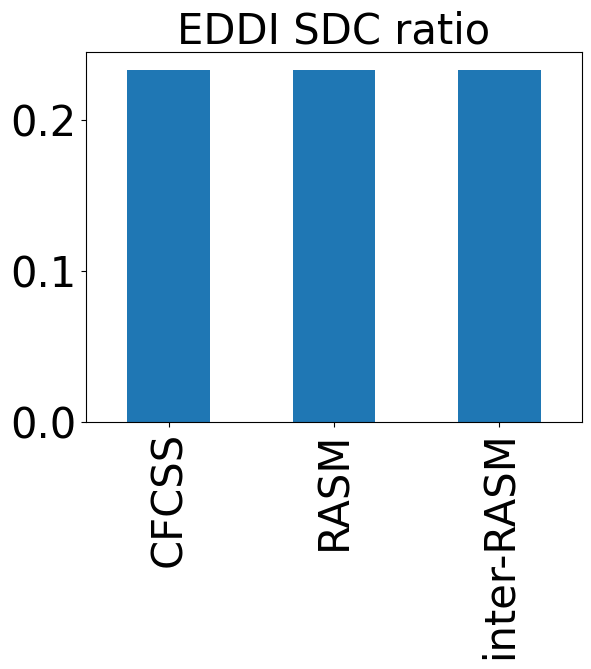

In [11]:
ax = df_perc.drop(['fdsc_cfcss', 'fdsc_rasm', 'fdsc_rasm_inter',
              'seddi_cfcss', 'seddi_rasm', 'seddi_rasm_inter', 'nopass']).plot(y=[-2], kind="bar")
ax.set_title("EDDI SDC ratio", fontdict={'fontsize': 30})
ax.tick_params(axis='both', which='major', labelsize=30)
ax.get_legend().remove()
labels = ['CFCSS', 'RASM', 'inter-RASM']
ax.set_xticklabels(labels)
plt.savefig("figures/eddi_sdc.svg",bbox_inches = 'tight')

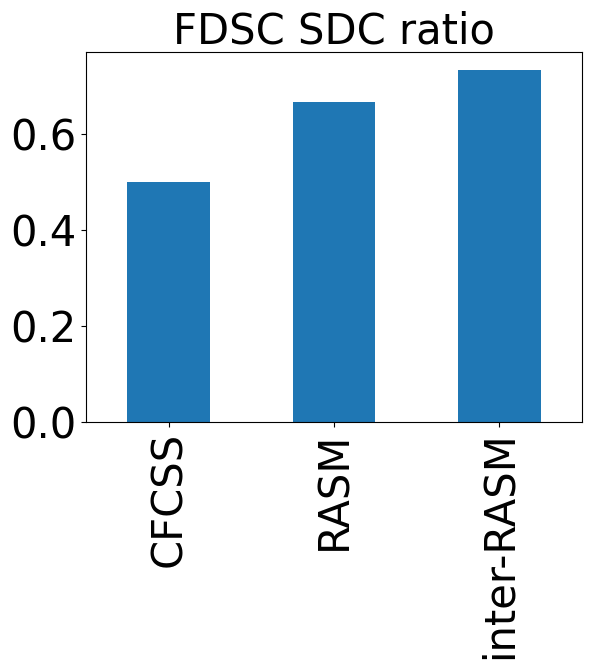

In [12]:
ax = df_perc.drop(['eddi_cfcss', 'eddi_rasm', 'eddi_rasm_inter',
              'seddi_cfcss', 'seddi_rasm', 'seddi_rasm_inter', 'nopass']).plot(y=[-2], kind="bar")
ax.set_title("FDSC SDC ratio", fontdict={'fontsize': 30})
ax.tick_params(axis='both', which='major', labelsize=30)
ax.get_legend().remove()
labels = ['CFCSS', 'RASM', 'inter-RASM']
ax.set_xticklabels(labels)
plt.savefig("figures/fdsc_sdc.svg",bbox_inches = 'tight')

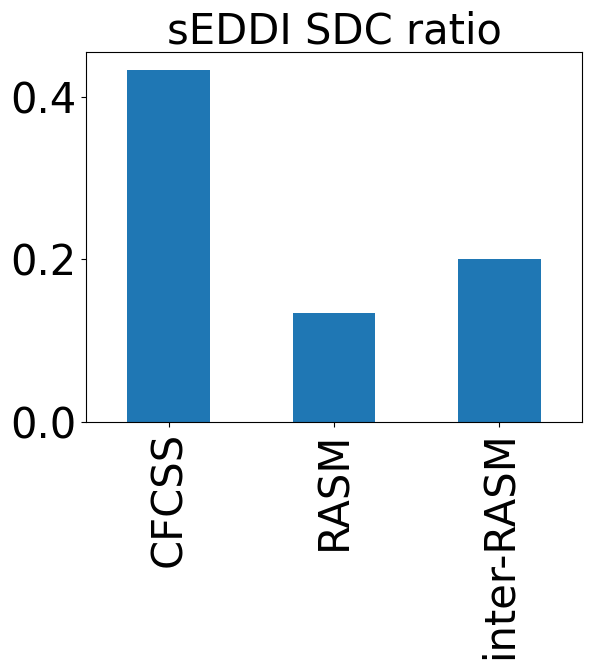

In [13]:
ax = df_perc.drop(['fdsc_cfcss', 'fdsc_rasm', 'fdsc_rasm_inter',
              'eddi_cfcss', 'eddi_rasm', 'eddi_rasm_inter', 'nopass']).plot(y=[-2], kind="bar")
ax.set_title("sEDDI SDC ratio", fontdict={'fontsize': 30})
ax.tick_params(axis='both', which='major', labelsize=30)
ax.get_legend().remove()
labels = ['CFCSS', 'RASM', 'inter-RASM']
ax.set_xticklabels(labels)
plt.savefig("figures/seddi_sdc.svg",bbox_inches = 'tight')